<a href="https://colab.research.google.com/github/wedexyz/eeg-/blob/main/ML_8chanel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


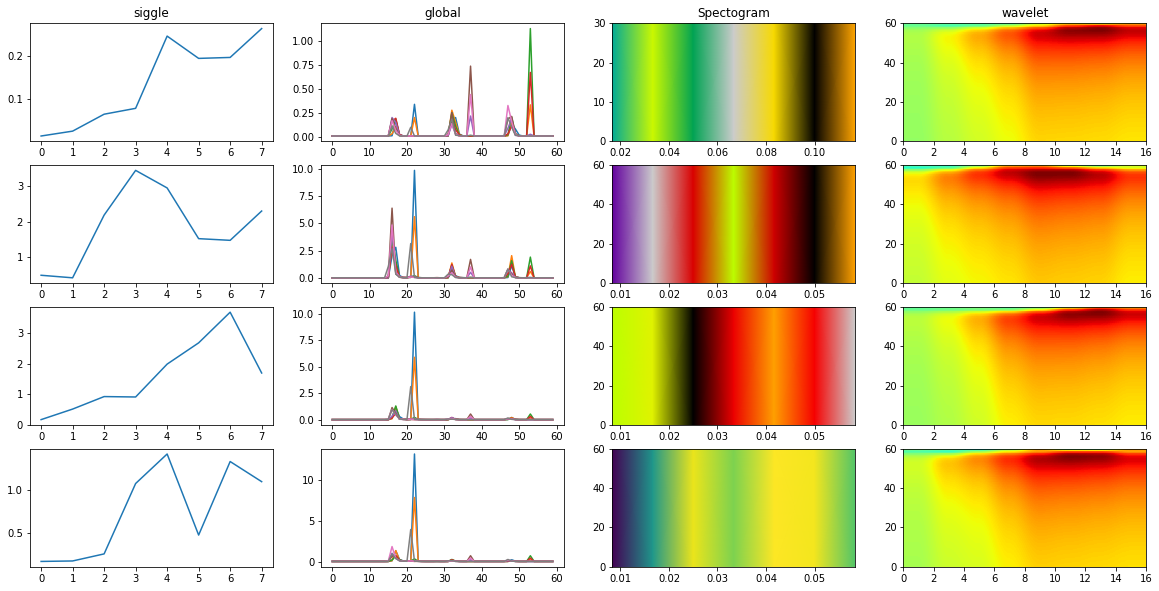

In [6]:

idle = np.load("/content/drive/MyDrive/Colab Notebooks/data8/idle/1608706768.npy")
kanan = np.load("/content/drive/MyDrive/Colab Notebooks/data8/kanan/1608707012.npy")
kiri = np.load("/content/drive/MyDrive/Colab Notebooks/data8/kiri/1608707050.npy")
maju = np.load("/content/drive/MyDrive/Colab Notebooks/data8/maju/1608706976.npy")

kelas1=idle[0][16]
kelas2=maju[0][16]
kelas3=kanan[0][16]
kelas4=kiri[0][16]

kelas1a=idle[175]
kelas2a=maju[175]
kelas3a=kanan[175]
kelas4a=kiri[175]

#print(idlea.shape)



f1, t1,Sxx= signal.spectrogram(kelas1,fs=60, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd',
                            )
dbs1 = 10*np.log10(Sxx)
f2, t2,Sxx= signal.spectrogram(kelas2,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd',
                            )
dbs2 = 10*np.log10(Sxx)
f3, t3,Sxx= signal.spectrogram(kelas3,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd'
                            )
dbs3 = 10*np.log10(Sxx)
f4, t4,Sxx= signal.spectrogram(kelas4,fs=120, window=('tukey', 0.25),
                             nperseg=2,
                             noverlap=1,
                             nfft=None, 
                             detrend='constant',
                             return_onesided=True, 
                             scaling='density', 
                             axis=-1,
                             mode='psd'
                            )  
dbs4 = 10*np.log10(Sxx)



fig, axs = plt.subplots(nrows=4, ncols=4,figsize=(20,10))
axs = axs.flatten()

axs[0].set_title("siggle")
axs[0].plot(kelas1)

axs[1].set_title("global")
axs[1].plot(kelas1a)

axs[2].set_title("Spectogram")
axs[2].pcolormesh(t1, f1,dbs1,  
                  shading='gouraud',
                  cmap='nipy_spectral')

cwt1 = signal.cwt(kelas1,signal.ricker,widths=np.arange(1,50))
cwt2 = signal.cwt(kelas2,signal.ricker,widths=np.arange(1,50))
cwt3 = signal.cwt(kelas3,signal.ricker,widths=np.arange(1,50))
cwt4 = signal.cwt(kelas4,signal.ricker,widths=np.arange(1,50))
axs[3].set_title("wavelet")
axs[3].imshow(cwt1,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt1).max(),vmin=-abs(cwt1).max())

axs[4].plot(kelas2)
axs[5].plot(kelas2a)
axs[6].pcolormesh(t2, f2,dbs2,  
                  shading='gouraud',
                  cmap='nipy_spectral')
axs[7].imshow(cwt2,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt2).max(),vmin=-abs(cwt2).max())

axs[8].plot(kelas3)
axs[9].plot(kelas3a)
axs[10].pcolormesh(t3, f3,dbs3,  
                  shading='gouraud',
                  cmap='nipy_spectral')
axs[11].imshow(cwt3,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt3).max(),vmin=-abs(cwt3).max())

axs[12].plot(kelas4)
axs[13].plot(kelas4a)
axs[14].pcolormesh(t4, f4,dbs4,  
                  shading='gouraud',
                  cmap='viridis')
axs[15].imshow(cwt4,extent=[0,16,0,60],cmap='jet',aspect='auto',vmax=abs(cwt4).max(),vmin=-abs(cwt4).max())
plt.show()


In [7]:
ACTIONS = ["kiri", "maju","idle","kanan"]
#reshape = (-1,16, 60,1)
reshape = (-1,8, 60,1)

#reshape(-1,28,28,1)




In [8]:
def create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/data8"):
    training_data = {}
    for action in ACTIONS:
        if action not in training_data:
            training_data[action] = []
        data_dir = os.path.join(starting_dir,action)
        for item in os.listdir(data_dir):
            data = np.load(os.path.join(data_dir, item))
            for item in data:
                training_data[action].append(item)

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)

    for action in ACTIONS:
        np.random.shuffle(training_data[action])  
        training_data[action] = training_data[action][:min(lengths)]

    lengths = [len(training_data[action]) for action in ACTIONS]
    print(lengths)
    combined_data = []
    for action in ACTIONS:
        for data in training_data[action]:
            if action == "kiri":
                combined_data.append([data, [1, 0, 0,0]])
            elif action == "maju":
                combined_data.append([data, [0, 1, 0, 0]])
            elif action == "idle":
                combined_data.append([data, [0, 0, 1, 0]])
            elif action == "kanan":
                combined_data.append([data, [0, 0, 0, 1]])

    np.random.shuffle(combined_data)
    print("length:",len(combined_data))
    return combined_data


In [9]:
print("creating training data")
traindata = create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/data8")
train_X = []
train_y = []

for X, y in traindata:
    train_X.append(X)
    train_y.append(y)






creating training data
[250, 250, 250, 250]
[250, 250, 250, 250]
length: 1000


In [10]:
print("creating testing data")
testdata = create_data(starting_dir="/content/drive/MyDrive/Colab Notebooks/data8")
test_X = []
test_y = []

for X, y in testdata:
    test_X.append(X)
    test_y.append(y)

train_X = np.array(train_X).reshape(reshape)
test_X = np.array(test_X).reshape(reshape)


train_y = np.array(train_y)
test_y = np.array(test_y)
print(train_y.shape)
print(test_y.shape)

creating testing data
[250, 250, 250, 250]
[250, 250, 250, 250]
length: 1000
(1000, 4)
(1000, 4)


In [93]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import multilabel_confusion_matrix
import time

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

sgd = SGDClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
ld = LinearDiscriminantAnalysis()
sv = SVC()

#clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf1 =OneVsRestClassifier(sgd)
clf2 =OneVsRestClassifier(lr)
clf3 =OneVsRestClassifier(rf)
clf4 =OneVsRestClassifier(ld)
clf5 =OneVsRestClassifier(sv)  

start=time.time()

clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)
clf4.fit(x_train,y_train)
clf5.fit(x_train,y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')

predictions1 = clf1.predict(x_train)
predictions2 = clf2.predict(x_train)
predictions3 = clf3.predict(x_train)
predictions4 = clf4.predict(x_train)
predictions5 = clf5.predict(x_train)

# accuracy
print("-------------------------")
print( "SGD")
print("Accuracy = ",accuracy_score(y_train,predictions1))
print("Hamming Loss = ",hamming_loss(y_train,predictions1))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_train,predictions1))

# accuracy
print("-------------------------")
print( "LR")
print("Accuracy = ",accuracy_score(y_train,predictions2))
print("Hamming Loss = ",hamming_loss(y_train,predictions2))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_train,predictions2))

# accuracy
print("-------------------------")
print( "RF")
print("Accuracy = ",accuracy_score(y_train,predictions3))
print("Hamming Loss = ",hamming_loss(y_train,predictions3))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_train,predictions3))

# accuracy
print("-------------------------")
print( "LD")
print("Accuracy = ",accuracy_score(y_train,predictions4))
print("Hamming Loss = ",hamming_loss(y_train,predictions4))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_train,predictions4))

# accuracy
print("-------------------------")
print( "SV")
print("Accuracy = ",accuracy_score(y_train,predictions5))
print("Hamming Loss = ",hamming_loss(y_train,predictions5))
print("label_ranking_average_precision_score",label_ranking_average_precision_score(y_train,predictions5))

training time taken:  0.0 seconds
-------------------------
SGD
Accuracy =  0.54
Hamming Loss =  0.145
label_ranking_average_precision_score 0.8952777777777778
-------------------------
LR
Accuracy =  0.71
Hamming Loss =  0.1
label_ranking_average_precision_score 0.9408333333333334
-------------------------
RF
Accuracy =  1.0
Hamming Loss =  0.0
label_ranking_average_precision_score 1.0
-------------------------
LD
Accuracy =  0.67
Hamming Loss =  0.115
label_ranking_average_precision_score 0.9333333333333335
-------------------------
SV
Accuracy =  0.74
Hamming Loss =  0.09
label_ranking_average_precision_score 0.9375000000000001
